# ACCESS-OM2 1$^\circ$ Comparison

This notebook compares our first pre-release of ACCESS-OM2 with our (hopefully final) ACCESS-OM2 Pre-release, implemented at 1°.


## Current Status


|** Run Name** | **Forcing** | ** Run ** | ** Status **|
|--------------|---------|-------------------------------------------------|-------------|
|1deg_jra55_ryf_spinup8 | JRA55 V1.1 RYF9091| Same as spinup7, but update to Nic's new executable where we **think** the melt flux is now handled correctly. Turned Red Sea fix back on after year 4. This is running smoothly, but I can't get the timestep beyond 2160 (we are hoping for 3600).  | Stopped after 300 years. | 
|1deg_jra55_ryf8485_spinup2 | JRA55 V1.1 RYF8485| Abhishek's 2nd attempt at an RYF8485 spinup. A useful point of comparison from the 9091 case.| Stopped after 200 years.| 
|1deg_jra55v13_ryf9091_spinup_A | JRA55 V1.3 RYF9091|  Following spinup8, but with a number of minor changes including updating the JRA forcing to v1.3, input.nml fixes, changes to Bering Strait and Red Sea topography, a more complete diag_table etc. Timestep up to 3600 and model seems stable.| At year 210.| 
|1deg_jra55v13_ryf8485_spinup_A | JRA55 V1.3 RYF8485|  An RYF8485 case with new forcing. | At year 120.| 
|1deg_jra55v13_ryf0304_spinup_A | JRA55 V1.3 RYF8485|  An RYF0304 case with new forcing. This run has been mislabelled as 8384 - oops.| At year 16.| 

### Notes

**Last updated 8 November 2017**

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

netcdf_index loaded.


In [3]:
import importlib

In [4]:
cc.start_cluster()

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 37466:127.0.0.1:37466 vdi-n8.nci.org.au -l jm0634


Client Scheduler: tcp://127.0.0.1:33283 Dashboard: http://127.0.0.1:37466,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [3]:
cc.build_index()


Found 119616 new variables
Saving results in database...
Indexing complete.


True

In [5]:
configuration = 'access-om2'
expts = cc.get_experiments(configuration)
display(expts)

['1deg_core_nyf_spinup_A',
 '1deg_jra55_ryf8485_spinup1',
 '1deg_jra55_ryf8485_spinup2',
 '1deg_jra55_ryf_RCP45',
 '1deg_jra55_ryf_spinup1',
 '1deg_jra55_ryf_spinup2',
 '1deg_jra55_ryf_spinup3',
 '1deg_jra55_ryf_spinup4',
 '1deg_jra55_ryf_spinup5',
 '1deg_jra55_ryf_spinup6',
 '1deg_jra55_ryf_spinup7',
 '1deg_jra55_ryf_spinup8',
 '1deg_jra55_ryf_spinup9',
 '1deg_jra55v13_ryf0304_spinup_A',
 '1deg_jra55v13_ryf8384_spinup_A',
 '1deg_jra55v13_ryf8485_spinup_A',
 '1deg_jra55v13_ryf9091_spinup_A']

## Experiments

In [6]:
# This subset of cases are the important ones
esub = ['1deg_jra55_ryf_spinup8',
 '1deg_jra55_ryf8485_spinup2',
 '1deg_jra55v13_ryf9091_spinup_A',
 '1deg_jra55v13_ryf8485_spinup_A',
 '1deg_jra55v13_ryf0304_spinup_A'
       ]

## Wind Stress
Just a simple plot showing zonally averaged zonal wind stress from each case.

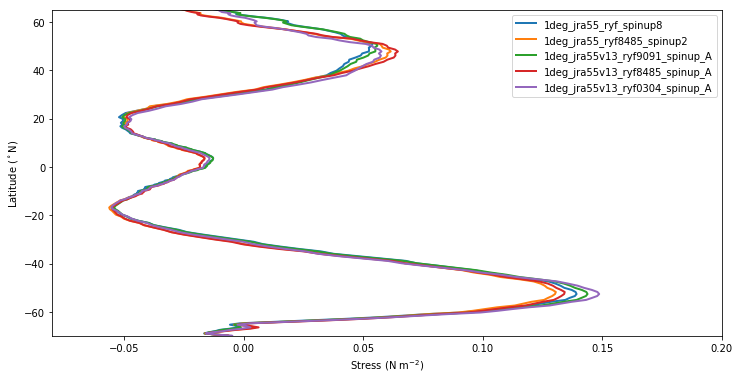

In [8]:
cc.plots.wind_stress(esub)

## Ocean Scalars
The following series of plots shows global timeseries of key metrics.

In [8]:
# If you want to clear stuff
#cc.diagnostics.annual_scalar.clear()

In [10]:
variables = ['temp_global_ave', 
             'salt_global_ave',
             'salt_surface_ave',
             'total_ocean_sfc_salt_flux_coupler',
             'eta_global']

plots.annual_scalar() can can take multiple variables at once (producing one figure per variable).  Internally, this is faster than plotting each scalar variable separately because the netCDF files are accessed only once for all the variables at once.

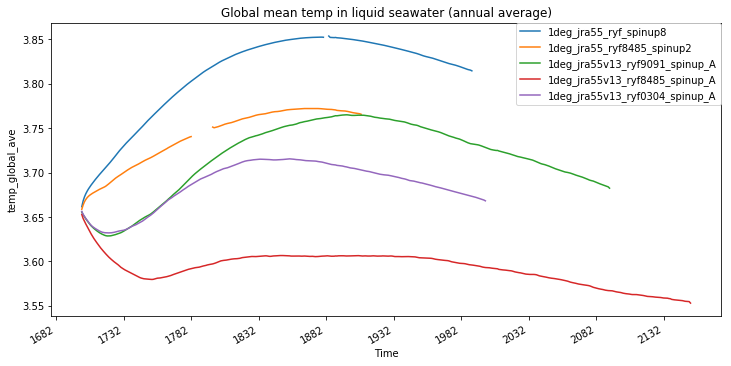

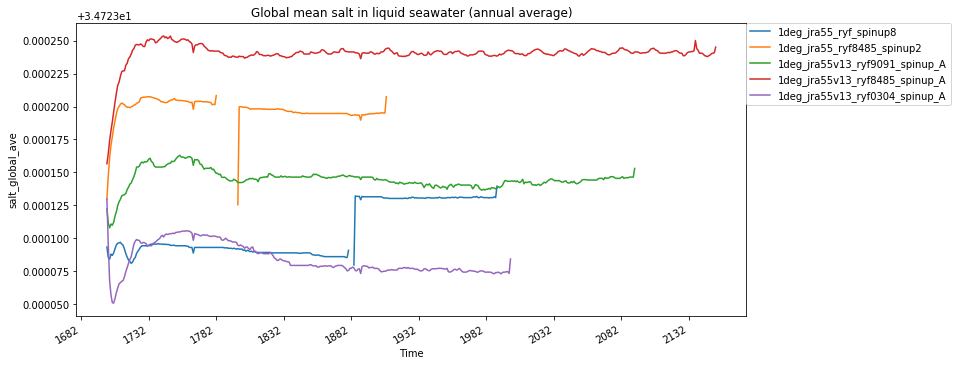

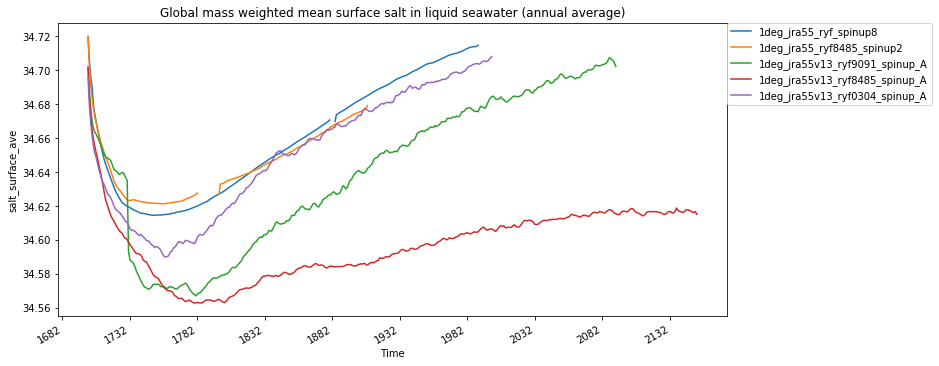

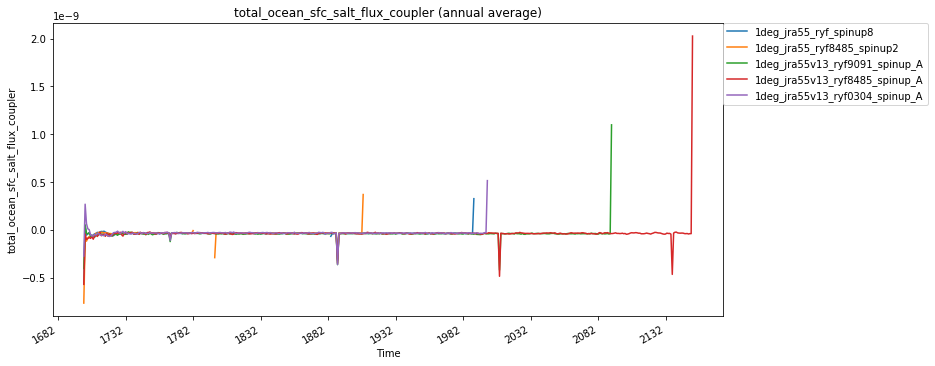

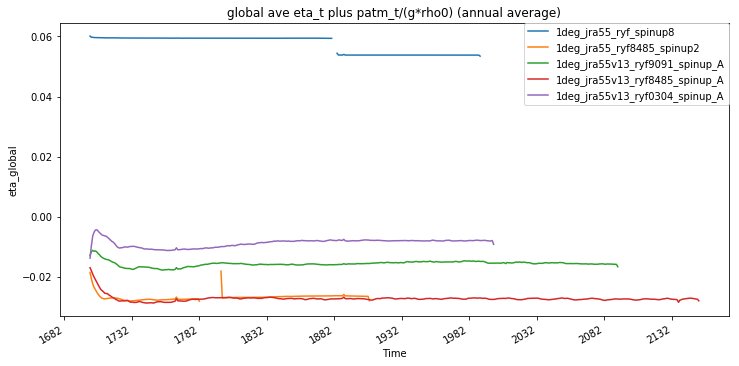

In [12]:
cc.plots.annual_scalar(esub, variables)

Alternatively, each variable can be ploted separately.  Note that since caching works on based on the list of arguments given, the plot below is not able to share the results of the function call above.

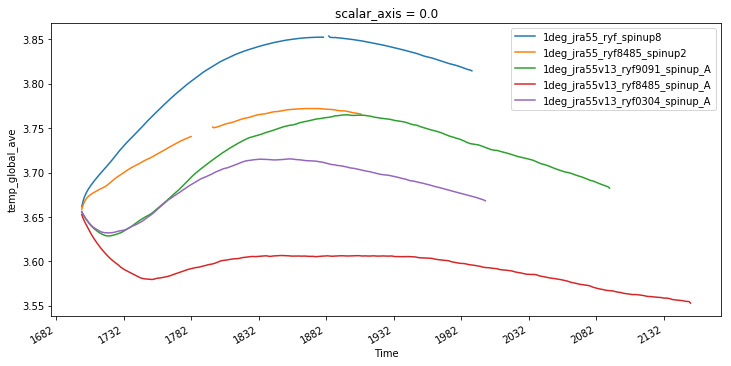

In [11]:
cc.plots.annual_scalar(esub, 'temp_global_ave')

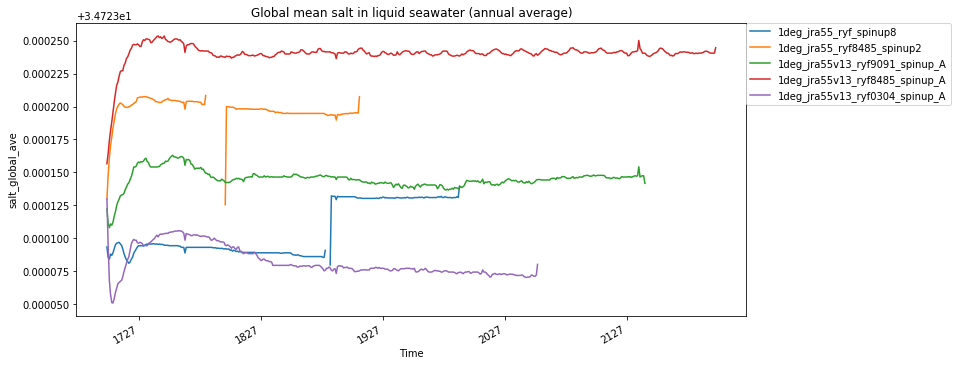

In [14]:
cc.plots.annual_scalar(esub, 'salt_global_ave')

In [ ]:
cc.plots.annual_scalar(esub, 'salt_surface_ave')

In [ ]:
cc.plots.annual_scalar(esub, 'total_ocean_sfc_salt_flux_coupler')

In [ ]:
cc.plots.annual_scalar(esub, 'eta_global')

# Drake Passage Transport

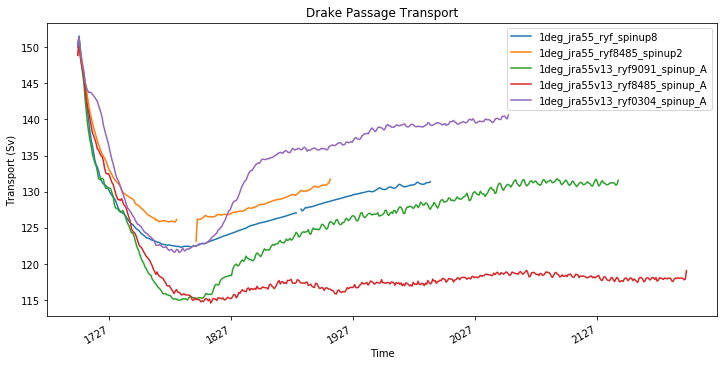

In [17]:
cc.plots.drake_passage(esub)

In [31]:
importlib.reload(cc.diagnostics.simple)
importlib.reload(cc.diagnostics.overturning)
importlib.reload(cc.diagnostics)

importlib.reload(cc.plots.overturning)
importlib.reload(cc.plots)

<module 'cosima_cookbook.plots' from '/g/data1/v45/jm0634/cosima-cookbook/cosima_cookbook/plots/__init__.py'>

# Meridional Overturning Circulation

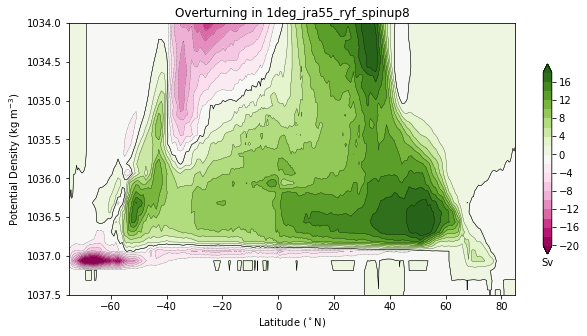

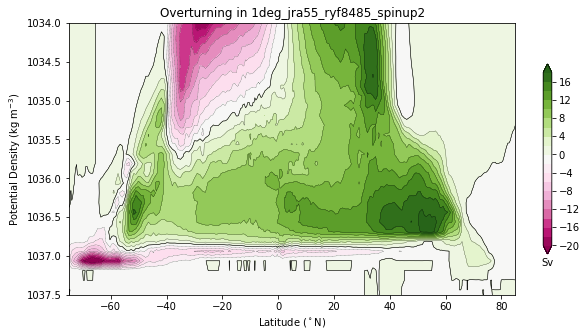

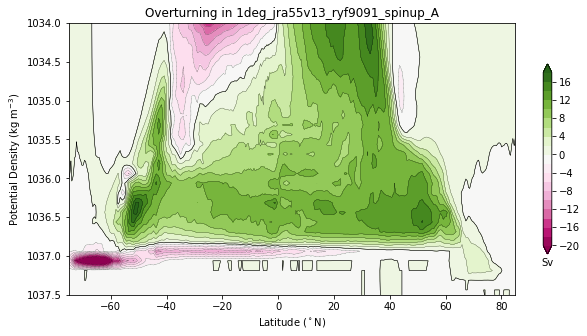

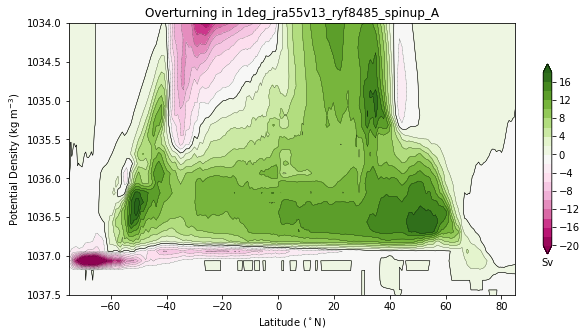

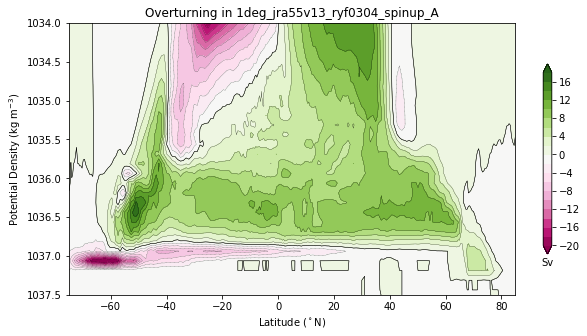

In [32]:
cc.plots.psi_avg(esub, 10, GM=True)

In [ ]:
cc.plots.aabw(esub, GM=True)

In [ ]:
cc.plots.amoc(esub, GM=True)

In [ ]:
cc.plots.amoc_south(esub, GM=True)

# Sea Surface Temperature
LH column shows SST, RH column shows difference from Year 1.

In [ ]:
cc.plots.sea_surface_temperature(esub[2:])

In [ ]:
cc.plots.sea_surface_salinity(esub[2:])

# Zonal Mean transects

In [ ]:
cc.plots.zonal_mean(esub,'temp',n=8)

In [ ]:
cc.plots.zonal_mean(esub,'salt',n=8)

# Bering Strait

Our latest run has a wider Bering Strait. How does it alter the flow there?

Plots below show that velocity has halved (hence improved model stability) but that the net transport is similar.

In [ ]:
for e in esub:
    vsurf = cc.get_nc_variable(e, 'ocean.nc', 'v',time_units = 'days since 1900-01-01',n=20)\
                        .isel(st_ocean=0).sel(xu_ocean=slice(-180,-160)).sel(yu_ocean=slice(50,80)).mean('time')
    plt.figure()
    vsurf.plot()
    plt.title(e)

In [ ]:
cc.plots.bering_strait(esub)

# Red Sea

We also widened Red Sea and Persian Gulf mouths in the hope of avoiding the redseagulfbayfix setting. It didn't work, and we had to switch it back on, leading to slightly lower salinity in the Red Sea overall.

In [ ]:
for e in esub:
    saltsurf = cc.get_nc_variable(e, 'ocean.nc', 'salt',time_units = 'days since 1900-01-01',n=20)\
                        .isel(st_ocean=0).sel(xt_ocean=slice(30,75)).sel(yt_ocean=slice(0,31)).mean('time')
    plt.figure()
    saltsurf.plot()
    plt.title(e)